# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

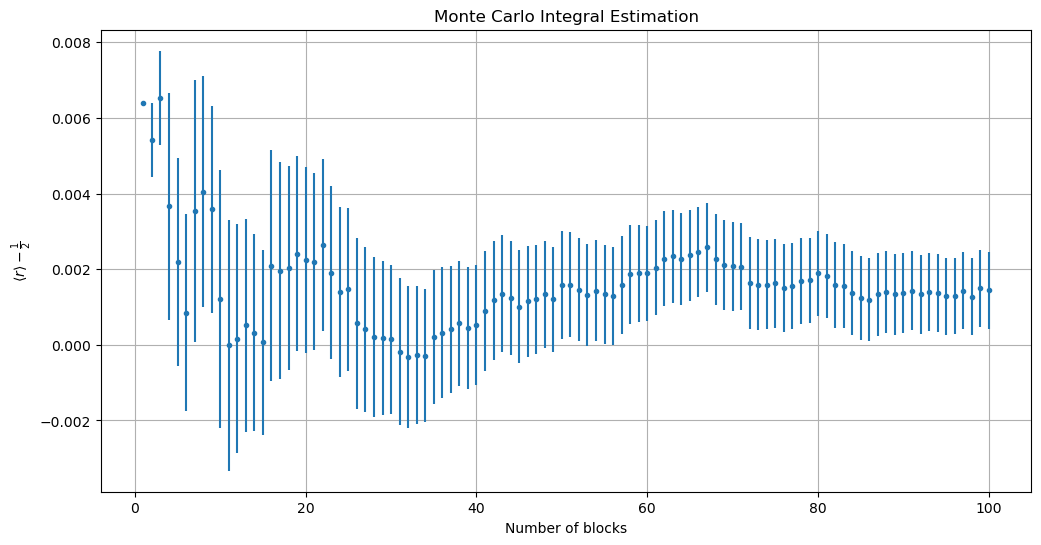

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
data = np.genfromtxt("OUTPUT/Integrali-1.1.out")

# Extract values and uncertainties
blocks = data[:, 0]  # Number of blocks
integral_values = data[:, 1]  # Integral values
uncertainties = data[:, 2]  # Uncertainties

# Plotting
plt.figure(figsize=(12,6))
plt.errorbar(blocks, integral_values-0.5, yerr=uncertainties, fmt='o', markersize=3, capsize=0)
plt.xlabel('Number of blocks')
plt.ylabel(r'$\left\langle r \right\rangle - \frac{1}{2}$')
plt.title('Monte Carlo Integral Estimation')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

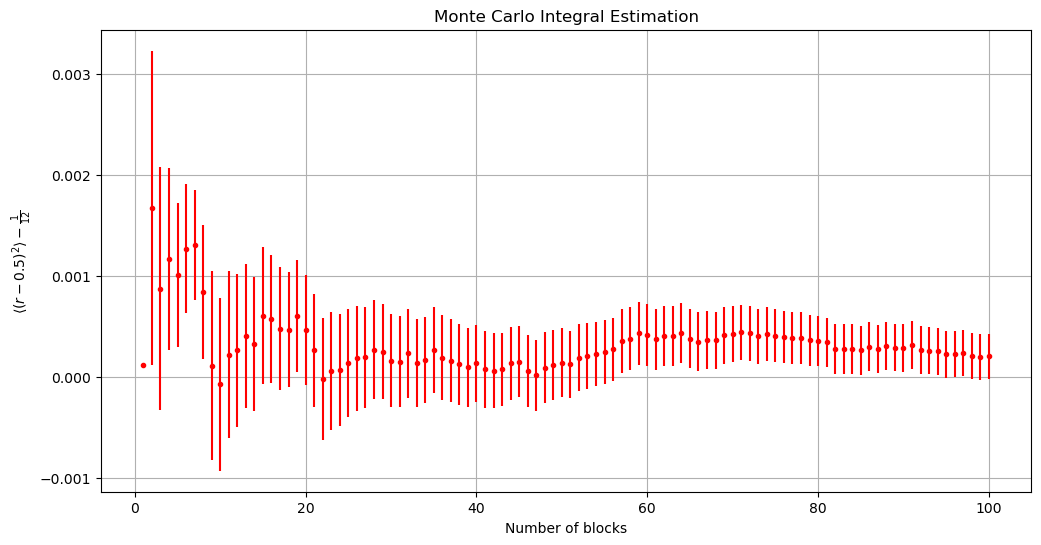

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
data = np.genfromtxt("OUTPUT/Integrali-1.2.out")

# Extract values and uncertainties
blocks = data[:, 0]  # Number of blocks
integral_values = data[:, 1]  # Integral values
uncertainties = data[:, 2]  # Uncertainties

# Plotting
plt.figure(figsize=(12,6))
plt.errorbar(blocks, integral_values-1/12, yerr=uncertainties, fmt='o', markersize=3, capsize=0, color='r')
plt.xlabel('Number of blocks')
plt.ylabel(r'$\left\langle (r-0.5)^2 \right\rangle - \frac{1}{12}$')
plt.title('Monte Carlo Integral Estimation')
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

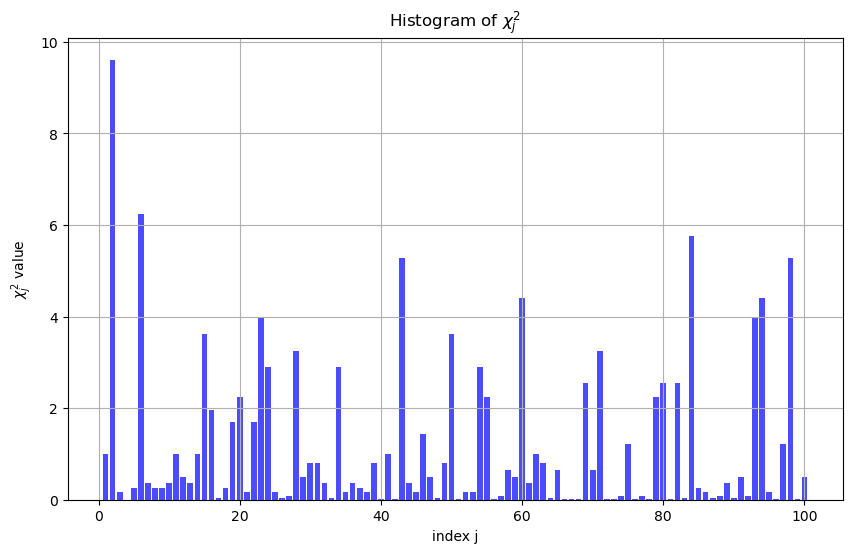

Chi^2: 115.91000000000005


In [22]:
import matplotlib.pyplot as plt

# Read data from file
with open('OUTPUT/Test-Chi.out', 'r') as file:
    data = [line.strip().split() for line in file if line.strip()]

# Initialize sum of frequencies
total_frequency = 0

# Separate values and frequencies
values = []
frequencies = []
for row in data:
    if len(row) >= 2:
        values.append(int(row[0]))
        frequency = float(row[1])  # Convert frequency to float
        frequencies.append(frequency)
        total_frequency += frequency  # Add frequency to total

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(values, frequencies, color='blue', alpha=0.7)
plt.xlabel('index j')
plt.ylabel('$\chi_j^2$ value')
plt.title('Histogram of $\chi_j^2$')
plt.grid(True)
plt.show()

# Print the total frequency
print("Chi^2:", total_frequency)


### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

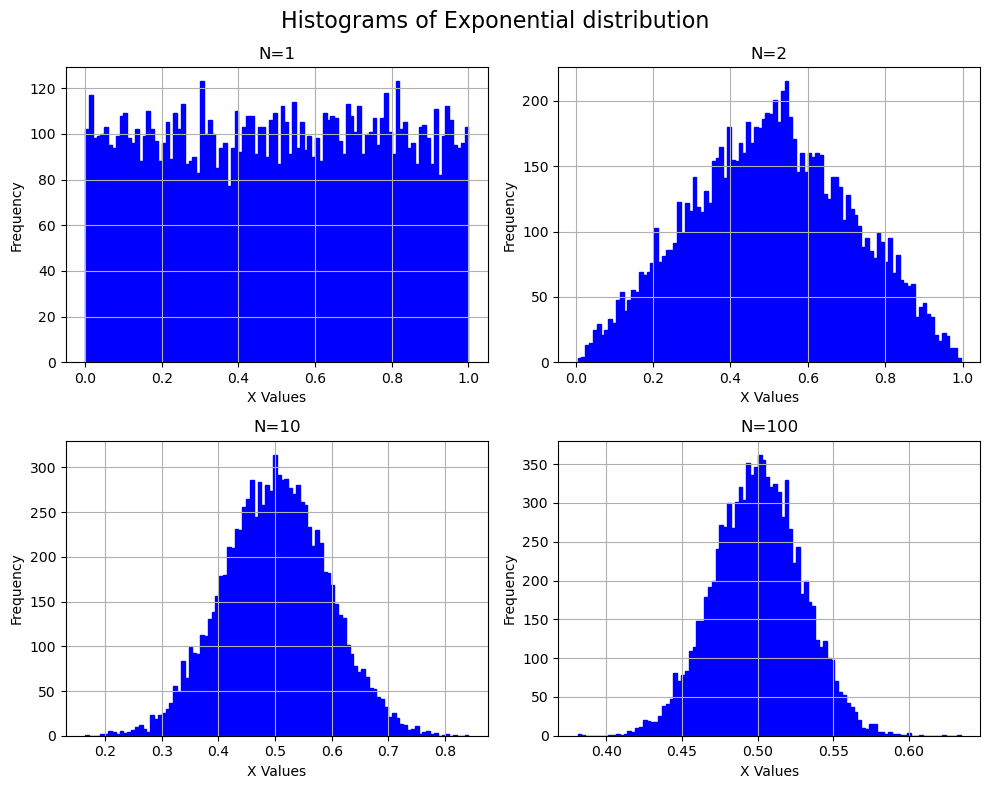

In [23]:
import matplotlib.pyplot as plt

# Read x values from a file
def read_values_from_file(filename):
    values = []
    with open(filename, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

# Plot histogram
def plot_histogram(ax, x_values, title):
    ax.hist(x_values, bins=100, color='blue', edgecolor='blue')
    ax.set_xlabel('X Values')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True)

# Main function
def main():
    filenames = ['OUTPUT/Dice_distribution1.out', 
                 'OUTPUT/Dice_distribution2.out', 
                 'OUTPUT/Dice_distribution10.out', 
                 'OUTPUT/Dice_distribution100.out']  # Replace with your file names
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Histograms of Exponential distribution', fontsize=16)
    titles = ['N=1', 'N=2', 'N=10', 'N=100']
    
    for i, filename in enumerate(filenames):
        x_values = read_values_from_file(filename)
        row = i // 2
        col = i % 2
        plot_histogram(axs[row, col], x_values, titles[i])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

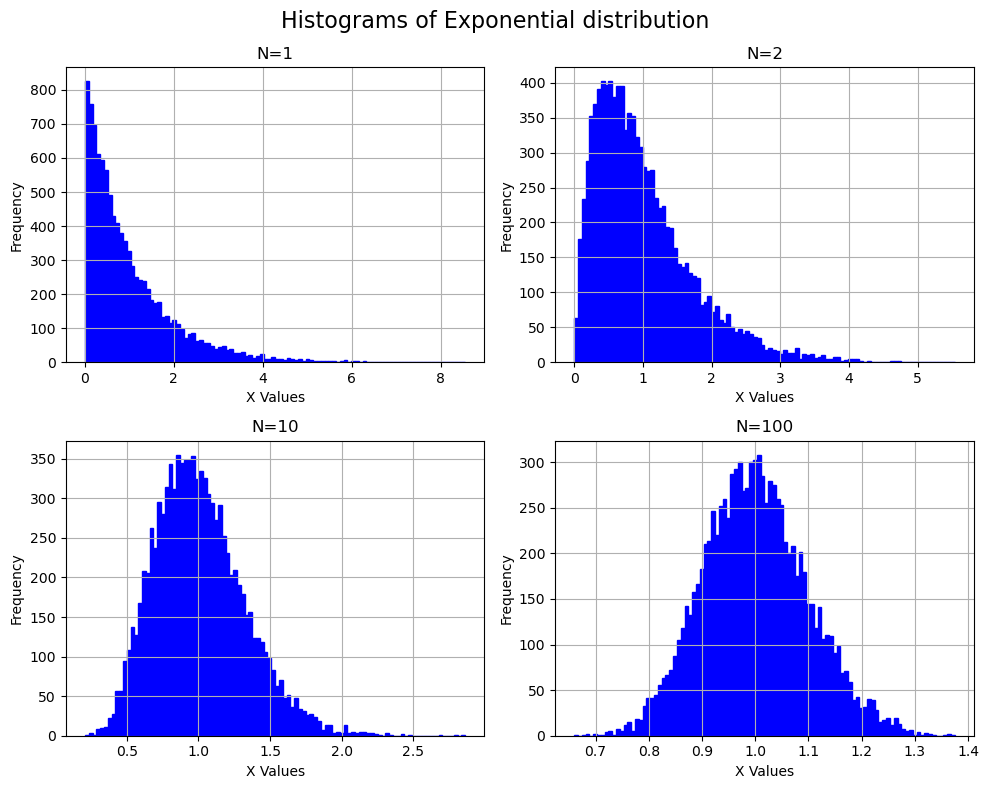

In [24]:
import matplotlib.pyplot as plt

# Read x values from a file
def read_values_from_file(filename):
    values = []
    with open(filename, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

# Plot histogram
def plot_histogram(ax, x_values, title):
    ax.hist(x_values, bins=100, color='blue', edgecolor='blue')
    ax.set_xlabel('X Values')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True)

# Main function
def main():
    filenames = ['OUTPUT/Exp_distribution1.out', 
                 'OUTPUT/Exp_distribution2.out', 
                 'OUTPUT/Exp_distribution10.out', 
                 'OUTPUT/Exp_distribution100.out']  # Replace with your file names
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Histograms of Exponential distribution', fontsize=16)
    titles = ['N=1', 'N=2', 'N=10', 'N=100']
    
    for i, filename in enumerate(filenames):
        x_values = read_values_from_file(filename)
        row = i // 2
        col = i % 2
        plot_histogram(axs[row, col], x_values, titles[i])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

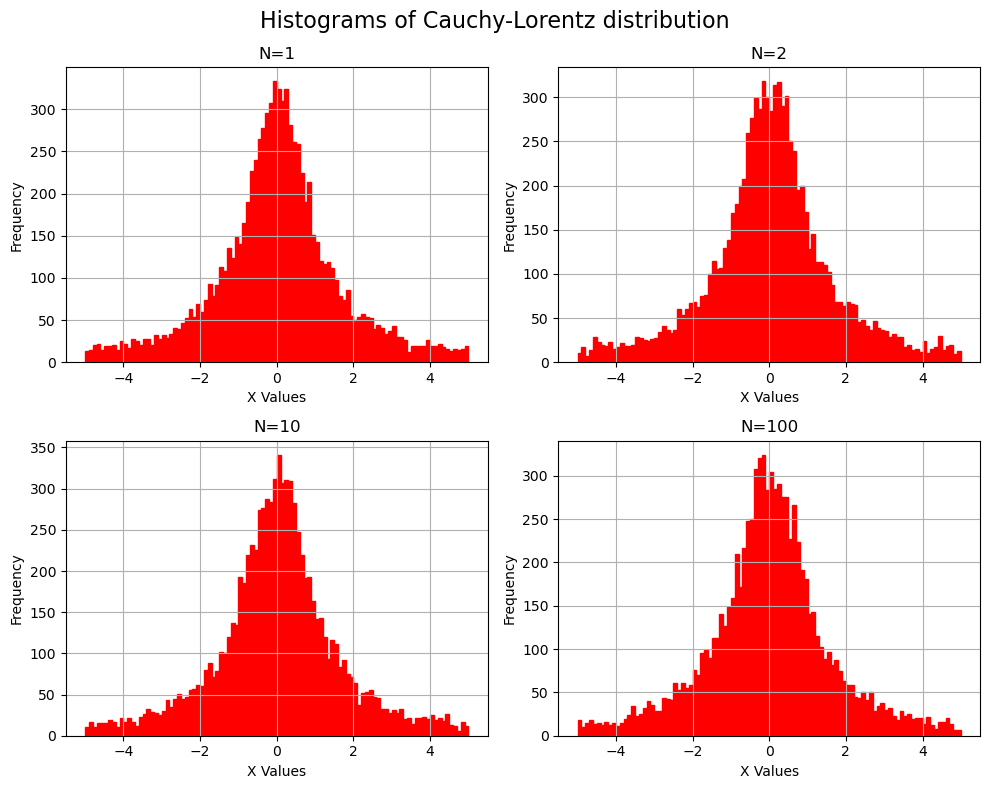

In [25]:
import matplotlib.pyplot as plt

# Read x values from a file
def read_values_from_file(filename):
    values = []
    with open(filename, 'r') as file:
        for line in file:
            value = float(line.strip())
            if -5 <= value <= 5:  # Check if value is within range
                values.append(value)
    return values

# Plot histogram
def plot_histogram(ax, x_values, title):
    ax.hist(x_values, bins=100, range=(-5, 5), color='red', edgecolor='red')
    ax.set_xlabel('X Values')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True)

# Main function
def main():
    filenames = ['OUTPUT/Lorentz_distribution1.out', 
                 'OUTPUT/Lorentz_distribution2.out', 
                 'OUTPUT/Lorentz_distribution10.out', 
                 'OUTPUT/Lorentz_distribution100.out']  # Replace with your file names
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Histograms of Cauchy-Lorentz distribution', fontsize=16)
    titles = ['N=1', 'N=2', 'N=10', 'N=100']
    
    for i, filename in enumerate(filenames):
        x_values = read_values_from_file(filename)
        row = i // 2
        col = i % 2
        plot_histogram(axs[row, col], x_values, titles[i])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

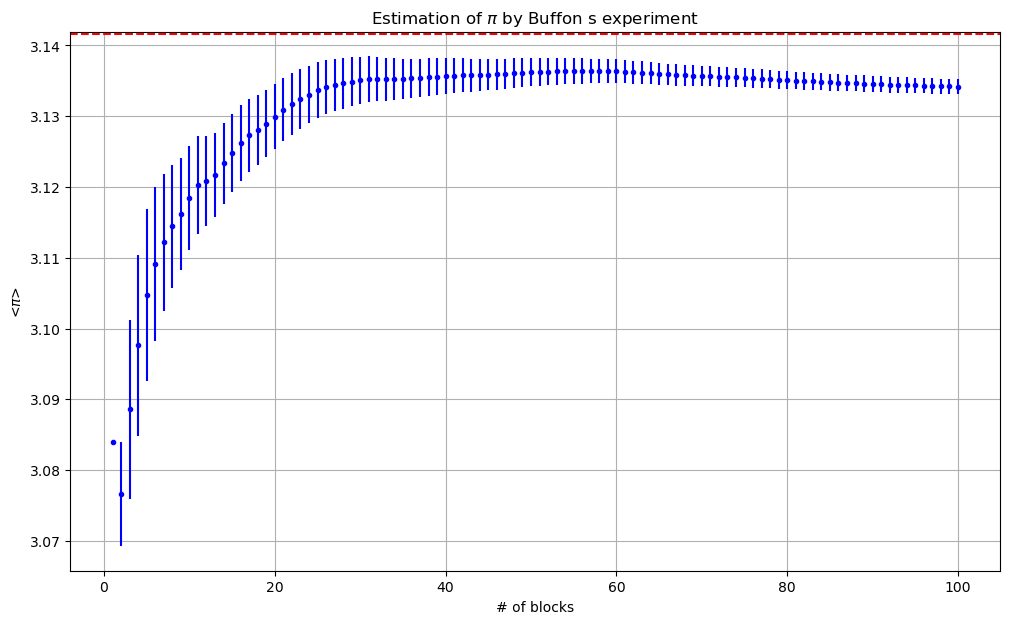

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
data = np.genfromtxt("OUTPUT/pi_10000perblock.out")

# Extract values and uncertainties
blocks = data[:, 0]  # Number of blocks
integral_values = data[:, 1]  # Integral values
uncertainties = data[:, 2]  # Uncertainties

# Plotting
plt.figure(figsize=(12,7))
plt.errorbar(blocks, integral_values, yerr=uncertainties, fmt='o', markersize=3, capsize=0, color='b')
plt.xlabel('# of blocks')
plt.ylabel('<$\pi$>')
plt.axhline(y=np.pi, color='r', linestyle='--', label='True $\pi$')
plt.title('Estimation of $\pi$ by Buffon s experiment')
plt.grid(True)
plt.show()

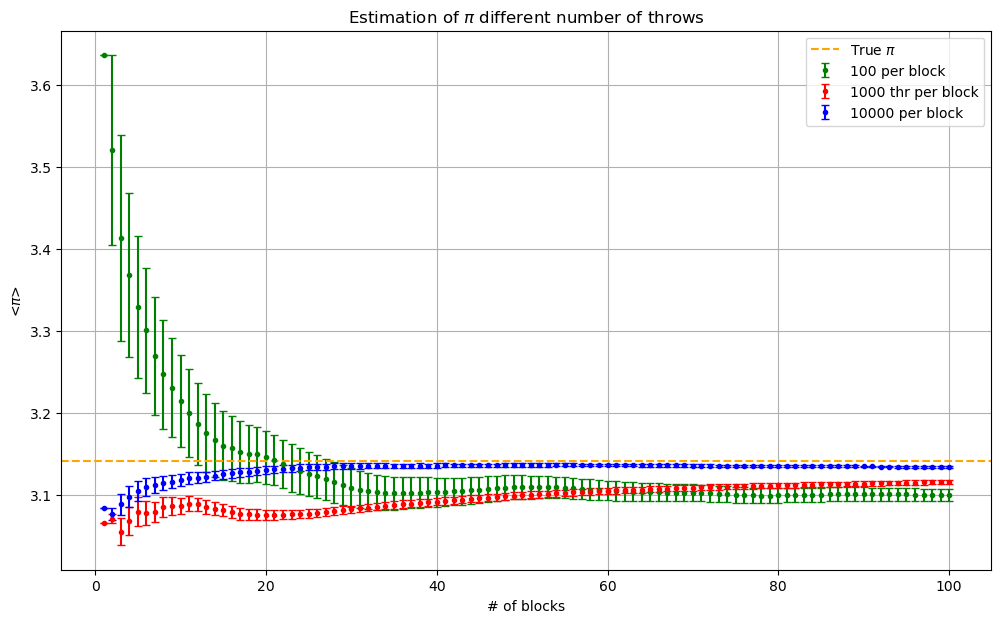

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file 100
data_100 = np.genfromtxt("OUTPUT/pi_100perblock.out")
blocks_100 = data_100[:, 0]  # Numero di blocchi
integral_values_100 = data_100[:, 1]  # Valori stimati di pi
uncertainties_100 = data_100[:, 2]  # Incertezze

# Leggi i dati dal file 1000
data_1000 = np.genfromtxt("OUTPUT/pi_1000perblock.out")
blocks_1000 = data_1000[:, 0]  # Numero di blocchi
integral_values_1000 = data_1000[:, 1]  # Valori stimati di pi
uncertainties_1000 = data_1000[:, 2]  # Incertezze

# Leggi i dati dal file 10000
data_10000 = np.genfromtxt("OUTPUT/pi_10000perblock.out")
blocks_10000 = data_10000[:, 0]  # Numero di blocchi
integral_values_10000 = data_10000[:, 1]  # Valori stimati di pi
uncertainties_10000 = data_10000[:, 2]  # Incertezze

# Plotting
plt.figure(figsize=(12, 7))

# Plotta i dati per 100 blocchi
plt.errorbar(blocks_100, integral_values_100, yerr=uncertainties_100, fmt='o', markersize=3, capsize=3, label='100 per block', color='g')

# Plotta i dati per 1000 blocchi
plt.errorbar(blocks_1000, integral_values_1000, yerr=uncertainties_1000, fmt='o', markersize=3, capsize=3, label='1000 thr per block', color='r')

# Plotta i dati per 10000 blocchi
plt.errorbar(blocks_10000, integral_values_10000, yerr=uncertainties_10000, fmt='o', markersize=3, capsize=3, label='10000 per block', color='b')

# Dettagli del grafico
plt.xlabel('# of blocks')
plt.ylabel('<$\pi$>')
plt.title('Estimation of $\pi$ different number of throws')
plt.axhline(y=np.pi, color='orange', linestyle='--', label='True $\pi$')
plt.legend()
plt.grid(True)
plt.show()
